In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

c:\users\10674329\appdata\local\programs\python\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\users\10674329\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
c:\users\10674329\appdata\local\programs\python\python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [63]:
df_train = pd.read_csv('C:\\Users\\10674329\\Downloads\\train (1).csv')
df_test = pd.read_csv('C:\\Users\\10674329\\Downloads\\test (1).csv')

In [64]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [66]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [67]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [68]:
df_train.Ticket.count()

891

In [69]:
df_train['Embarked'] = df_train['Embarked'].fillna(method = 'ffill')

In [70]:
df_train = df_train.drop(['Name','Age','Ticket','Fare','Cabin'],axis=1)
df_test = df_test.drop(['Name','Age','Ticket','Fare','Cabin'],axis=1)

In [71]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Sex          891 non-null    object
 4   SibSp        891 non-null    int64 
 5   Parch        891 non-null    int64 
 6   Embarked     891 non-null    object
dtypes: int64(5), object(2)
memory usage: 48.9+ KB


In [72]:
df_test.describe()

,PassengerId,Pclass,SibSp,Parch
count,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,0.447368,0.392344
std,120.810458,0.841838,0.896760,0.981429
min,892.000000,1.000000,0.000000,0.000000
25%,996.250000,1.000000,0.000000,0.000000
50%,1100.500000,3.000000,0.000000,0.000000
75%,1204.750000,3.000000,1.000000,0.000000
max,1309.000000,3.000000,8.000000,9.000000


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

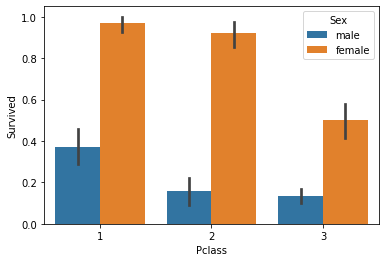

In [73]:
sns.barplot(x=df_train.Pclass,y=df_train.Survived,hue=df_train.Sex)

In [74]:
def gender(sex):
    if sex == 'male':
        return 1
    else:
        return 0


In [75]:
df_train['Gender'] = df_train.Sex.apply(gender)
df_test['Gender'] = df_test.Sex.apply(gender)

In [76]:
df_train =df_train.drop('Sex',axis=1)
df_test =df_test.drop('Sex',axis=1)

In [77]:
combine = [df_train, df_test]
print("Before", df_train.shape, df_test.shape, combine[0].shape, combine[1].shape)



"After", df_train.shape, df_test.shape, combine[0].shape, combine[1].shape

Before (891, 7) (418, 6) (891, 7) (418, 6)


('After', (891, 7), (418, 6), (891, 7), (418, 6))

In [78]:
df_train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [85]:
# embarked = pd.get_dummies(df_train.Embarked)
embarked_test = pd.get_dummies(df_test.Embarked)
# sibsp = pd.get_dummies(df_train.SibSp)
# parch = pd.get_dummies(df_train.Parch)
# sibsp_test = pd.get_dummies(df_test.SibSp)
# parch_test = pd.get_dummies(df_test.Parch)

# df_train = pd.concat([df_train.drop(['Embarked'],axis=1),embarked],axis=1)
df_test = pd.concat([df_test.drop(['Embarked'],axis=1),embarked_test],axis=1)

In [86]:
df_test.head()

,PassengerId,Pclass,SibSp,Parch,Gender,C,Q,S
0,892,3,0,0,1,0,1,0
1,893,3,1,0,0,0,0,1
2,894,2,0,0,1,0,1,0
3,895,3,0,0,1,0,0,1
4,896,3,1,1,0,0,0,1


In [87]:
X_train = df_train.drop("Survived", axis=1)
y_train = df_train["Survived"]
X_test  = df_test.copy()
X_train.shape, y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [88]:
model = LogisticRegression()
model.fit(X_train, y_train)
predict = model.predict(X_test)
acc_log = round(model.score(X_train, y_train) * 100, 2)
acc_log

c:\users\10674329\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


79.12

In [89]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

61.62

In [90]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

76.21

In [91]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

38.83

In [92]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

c:\users\10674329\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


79.24

In [93]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

61.73

In [99]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

100.0

In [95]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

100.0

In [96]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

79.91

In [97]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,100.00
8,Decision Tree,100.00
1,KNN,79.91
7,Linear SVC,79.24
2,Logistic Regression,79.12
4,Naive Bayes,76.21
6,Stochastic Gradient Decent,61.73
0,Support Vector Machines,61.62
5,Perceptron,38.83


In [100]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": Y_pred
    })

In [102]:
submission.to_csv('Surviver_prediction.csv',index=False)

In [103]:
df_test.head()

,PassengerId,Pclass,SibSp,Parch,Gender,C,Q,S
0,892,3,0,0,1,0,1,0
1,893,3,1,0,0,0,0,1
2,894,2,0,0,1,0,1,0
3,895,3,0,0,1,0,0,1
4,896,3,1,1,0,0,0,1
